### Question 2 : Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

### Table of content
    1.Data Processing 
    2.Evaluation of top complaint type among borughs,ZIP codes and street 
    3.Conclusion

## 1.Data Processing

In [55]:
#importing libraries and fetching data
#My Rough work for this module is in last line of Note Book.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
#Processing 311 HPD data set
columns_selected = ['created_date','unique_key','complaint_type','incident_zip','incident_address','city','borough','latitude','location_type','longitude','street_name']
df_hpd = pd.read_csv('311.csv',parse_dates = ['created_date'],usecols=columns_selected)
df_hpd.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-11-01 07:35:46,44202740,HEAT/HOT WATER,10075.0,416 EAST 78 STREET,EAST 78 STREET,NEW YORK,MANHATTAN,40.771400,-73.952597,RESIDENTIAL BUILDING
1,2019-11-01 17:17:03,44206980,ELECTRIC,10467.0,3324 PERRY AVENUE,PERRY AVENUE,BRONX,BRONX,40.877661,-73.874858,RESIDENTIAL BUILDING
2,2019-11-01 12:46:43,44204492,HEAT/HOT WATER,11219.0,1254 42 STREET,42 STREET,BROOKLYN,BROOKLYN,40.639556,-73.989068,RESIDENTIAL BUILDING
3,2019-11-01 05:31:13,44205138,HEAT/HOT WATER,10459.0,1116 HOE AVENUE,HOE AVENUE,BRONX,BRONX,40.826121,-73.890890,RESIDENTIAL BUILDING
4,2019-11-01 07:40:20,44202027,HEAT/HOT WATER,11225.0,1700 BEDFORD AVENUE,BEDFORD AVENUE,BROOKLYN,BROOKLYN,40.665006,-73.957127,RESIDENTIAL BUILDING


In [57]:
#creating data frame for top complaint 'HEAT/HOTWATER'
df_hpd_top_complaint=df_hpd[df_hpd['complaint_type']=='HEAT/HOT WATER'].reset_index(drop=True)
df_hpd_top_complaint.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-11-01 07:35:46,44202740,HEAT/HOT WATER,10075.0,416 EAST 78 STREET,EAST 78 STREET,NEW YORK,MANHATTAN,40.771400,-73.952597,RESIDENTIAL BUILDING
1,2019-11-01 12:46:43,44204492,HEAT/HOT WATER,11219.0,1254 42 STREET,42 STREET,BROOKLYN,BROOKLYN,40.639556,-73.989068,RESIDENTIAL BUILDING
2,2019-11-01 05:31:13,44205138,HEAT/HOT WATER,10459.0,1116 HOE AVENUE,HOE AVENUE,BRONX,BRONX,40.826121,-73.890890,RESIDENTIAL BUILDING
3,2019-11-01 07:40:20,44202027,HEAT/HOT WATER,11225.0,1700 BEDFORD AVENUE,BEDFORD AVENUE,BROOKLYN,BROOKLYN,40.665006,-73.957127,RESIDENTIAL BUILDING
4,2019-11-01 18:17:22,44204419,HEAT/HOT WATER,10031.0,541 WEST 144 STREET,WEST 144 STREET,NEW YORK,MANHATTAN,40.825071,-73.949288,RESIDENTIAL BUILDING


In [58]:
#find the dimensions of data frame
df_hpd_top_complaint.shape

(1168990, 11)

## 2.Evaluation of top complaint type among borughs,ZIP codes and street 

#### Looking for top_complaint severity among borough,zip codes and steert name

In [59]:
#look for unique values in borough first
df_hpd_top_complaint['borough'].unique()

array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [60]:
#Identify unspecified value by its latitude and longitude or by incident address

df_unspecified = df_hpd_top_complaint[df_hpd_top_complaint['borough'] == 'Unspecified'] 
df_brooklyn = df_hpd_top_complaint[df_hpd_top_complaint['borough'] == 'BROOKLYN'] 
df_bronx = df_hpd_top_complaint[df_hpd_top_complaint['borough'] == 'BRONX'] 
df_queens = df_hpd_top_complaint[df_hpd_top_complaint['borough'] == 'QUEENS'] 
df_staten_island = df_hpd_top_complaint[df_hpd_top_complaint['borough'] == 'STATEN ISLAND'] 
df_man = df_hpd_top_complaint[df_hpd_top_complaint['borough'] == 'MANHATTAN']
#see the dataframe content
print(df_unspecified)
#print(df_unspecified.info())

              created_date  unique_key  complaint_type  incident_zip  \
904653 2018-03-10 11:16:48    38662770  HEAT/HOT WATER       10463.0   

           incident_address       street_name      city      borough  \
904653  38 WEST  225 STREET  WEST  225 STREET  NEW YORK  Unspecified   

         latitude  longitude         location_type  
904653  40.873635 -73.907925  RESIDENTIAL BUILDING  


In [61]:
#compare latitiude and longitudes of unspecified with other groups

df_lat_long_unsp = df_unspecified.iloc[0:2,8:10]
df_lat_long_brooklyn = df_brooklyn.iloc[0:2,8:10]
df_lat_long_bronx = df_bronx.iloc[0:2,8:10]
df_lat_long_queens = df_queens.iloc[0:2,8:10] 
df_lat_long_staten_island = df_staten_island.iloc[0:2,8:10]
df_lat_long_man = df_man.iloc[0:2,8:10]

#print(df_lat_long_unsp.info())
b= len(df_lat_long_unsp)
for i in range(b):
        print('(lat,log) of unspecified',df_lat_long_unsp.iloc[i,:])
        print('(lat,log) of Brooklyn',df_lat_long_brooklyn.iloc[i,:])
        print('(lat,log) of Bronx',df_lat_long_bronx.iloc[i,:])
        print('(lat,log) of Queens',df_lat_long_queens.iloc[i,:])
        print('(lat,log) of Staten',df_lat_long_staten_island.iloc[i,:])
        print('(lat,log) of man',df_lat_long_man.iloc[i,:])

(lat,log) of unspecified latitude     40.873635
longitude   -73.907925
Name: 904653, dtype: float64
(lat,log) of Brooklyn latitude     40.639556
longitude   -73.989068
Name: 1, dtype: float64
(lat,log) of Bronx latitude     40.826121
longitude   -73.890890
Name: 2, dtype: float64
(lat,log) of Queens latitude     40.764825
longitude   -73.913115
Name: 7, dtype: float64
(lat,log) of Staten latitude     40.587303
longitude   -74.157289
Name: 58, dtype: float64
(lat,log) of man latitude     40.771400
longitude   -73.952597
Name: 0, dtype: float64


In [62]:
# from above result since all (lat,long) values are very close it is difficult to find unspecified value
# Do further analysis by using incident_address
#compare latitiude and longitudes of unspecified with other groups



df_ia_unsp = df_unspecified.iloc[0:1,4:5]
df_ia_brooklyn = df_brooklyn.iloc[0:,4:5]
df_ia_bronx = df_bronx.iloc[0:,4:5]
df_ia_queens = df_queens.iloc[0:,4:5] 
df_ia_staten_island = df_staten_island.iloc[0:,4:5]
df_ia_man = df_man.iloc[0:,4:5]

print(df_ia_man.info())


df_find_ia1 = df_ia_bronx.where(df_ia_bronx.values == df_ia_unsp.values).notna()
print('bronx_ia',df_find_ia1.info())
df_find_ia2 = df_ia_brooklyn.where(df_ia_brooklyn.values == df_ia_unsp.values).notna()
print('brooklyn_ia',df_find_ia2.info())
df_find_ia3 = df_ia_staten_island.where(df_ia_staten_island.values == df_ia_unsp.values).notna()
print('staten_island',df_find_ia3.info())
df_find_ia4 = df_ia_queens.where(df_ia_queens.values == df_ia_unsp.values).notna()
print('queens_ia',df_find_ia4.info())

# It was found that staten_island had 58 similar addresses.
#so assgin unspecified to staten_island
df_hpd_top_complaint.at[904653,'borough'] = 'STATEN ISLAND'
print(df_hpd_top_complaint['borough'].unique())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 265188 entries, 0 to 1168988
Data columns (total 1 columns):
incident_address    265188 non-null object
dtypes: object(1)
memory usage: 4.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 379199 entries, 2 to 1168989
Data columns (total 1 columns):
incident_address    379199 non-null bool
dtypes: bool(1)
memory usage: 3.3 MB
bronx_ia None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 358001 entries, 1 to 1168979
Data columns (total 1 columns):
incident_address    358001 non-null bool
dtypes: bool(1)
memory usage: 3.1 MB
brooklyn_ia None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11580 entries, 58 to 1168972
Data columns (total 1 columns):
incident_address    11580 non-null bool
dtypes: bool(1)
memory usage: 101.8 KB
staten_island None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155021 entries, 7 to 1168970
Data columns (total 1 columns):
incident_address    155021 non-null bool
dtypes: bool(1)
memory usage: 1

#### Looking for Top_Complaint severity with respect to Borough

<Figure size 720x720 with 0 Axes>

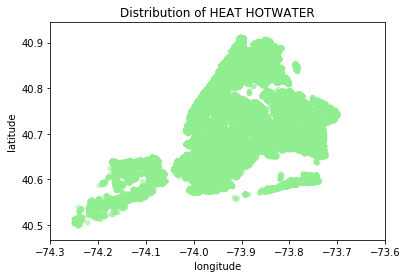

In [63]:
##Used already processed data frame df_hpd_top_complaint and accessed column borough.
#visuvalize top_complaint using scatter plot
#My Rough work for this module is in last line of Note Book.
plt.figure(figsize = [10,10])
ax0=df_hpd_top_complaint.plot(kind = 'scatter', x= 'longitude',y='latitude',alpha=0.5,color="lightgreen",xlim=(-74.3,-73.6))
ax0.set_ylabel('latitude')
ax0.set_xlabel('longitude')
ax0.set_title('Distribution of HEAT HOTWATER')
plt.show()


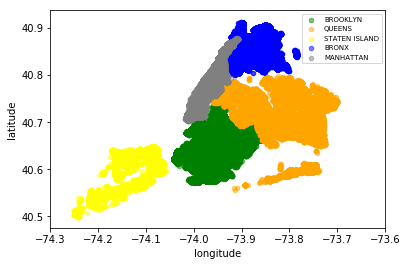

In [64]:
#Used already processed data frame df_hpd_top_complaint and accessed column borough.
#This is complex part, so Written diffrent scipts with various logics to process dataframe
#and also used various plot libaries
# before come out with this simple script  to visuvalize the scatter plot for top_complaint(HEAT HOTWATER)
#from this plot the 'top_complaint' is concentrated more in brooklyn,manhattan and bronx.
#My Rough work for this module is in last line of Note Book(not formated,tried diffrent logic).

ax0=df_hpd_top_complaint[df_hpd_top_complaint['borough']=='BROOKLYN'].plot(kind = 'scatter', x= 'longitude',y='latitude',alpha=0.5,color="green",xlim=(-74.3,-73.6))
ax1=df_hpd_top_complaint[df_hpd_top_complaint['borough']=='QUEENS'].plot(kind = 'scatter', x= 'longitude',y='latitude',alpha=0.5,color="orange",ax=ax0)
ax2=df_hpd_top_complaint[df_hpd_top_complaint['borough']=='STATEN ISLAND'].plot(kind = 'scatter', x= 'longitude',y='latitude',alpha=0.5,color="yellow",ax=ax0)
ax3=df_hpd_top_complaint[df_hpd_top_complaint['borough']=='BRONX'].plot(kind = 'scatter', x= 'longitude',y='latitude',alpha=0.5,color="blue",ax=ax0)
ax4=df_hpd_top_complaint[df_hpd_top_complaint['borough']=='MANHATTAN'].plot(kind = 'scatter', x= 'longitude',y='latitude',alpha=0.5,color="gray",ax=ax0)
ax0.legend([ 'BROOKLYN', 'QUEENS', 'STATEN ISLAND','BRONX','MANHATTAN'],loc='best',fontsize = 'x-small')
plt.show()

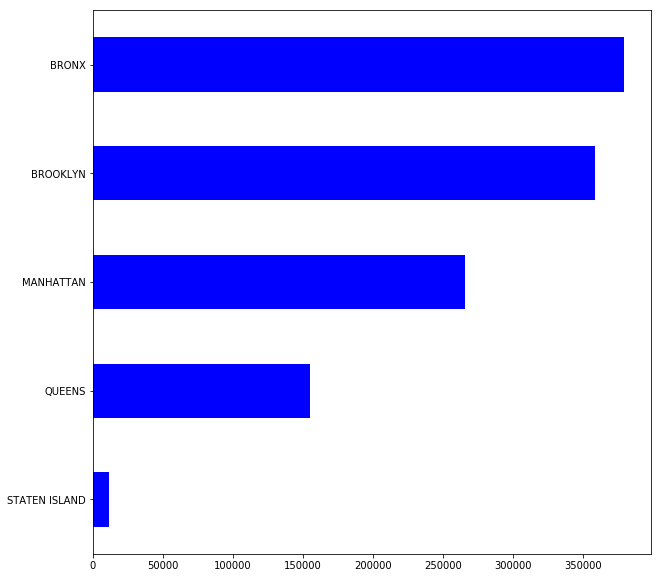

In [65]:
#lets confirm it by ploting value_counts for each city in 'borough' 
#processing dataframe for histogram bar graph

df_hpd_top_complaint_series = df_hpd_top_complaint['borough'].value_counts()
#sort it 
df_hpd_top_complaint_series.sort_values(ascending = True, inplace =True)
#sum it and add it to the data frame
#total_df_hpd_top_complaint = df_hpd_top_complaint_series.sum()
#plotting barh 
df_hpd_top_complaint_series.plot(kind = 'barh',figsize = (10,10),color = 'blue')
# it is confirmed that the value_count is as per scatter plot
plt.show()

#### Looking for Top_Complaint severity  with respect to zip codes 

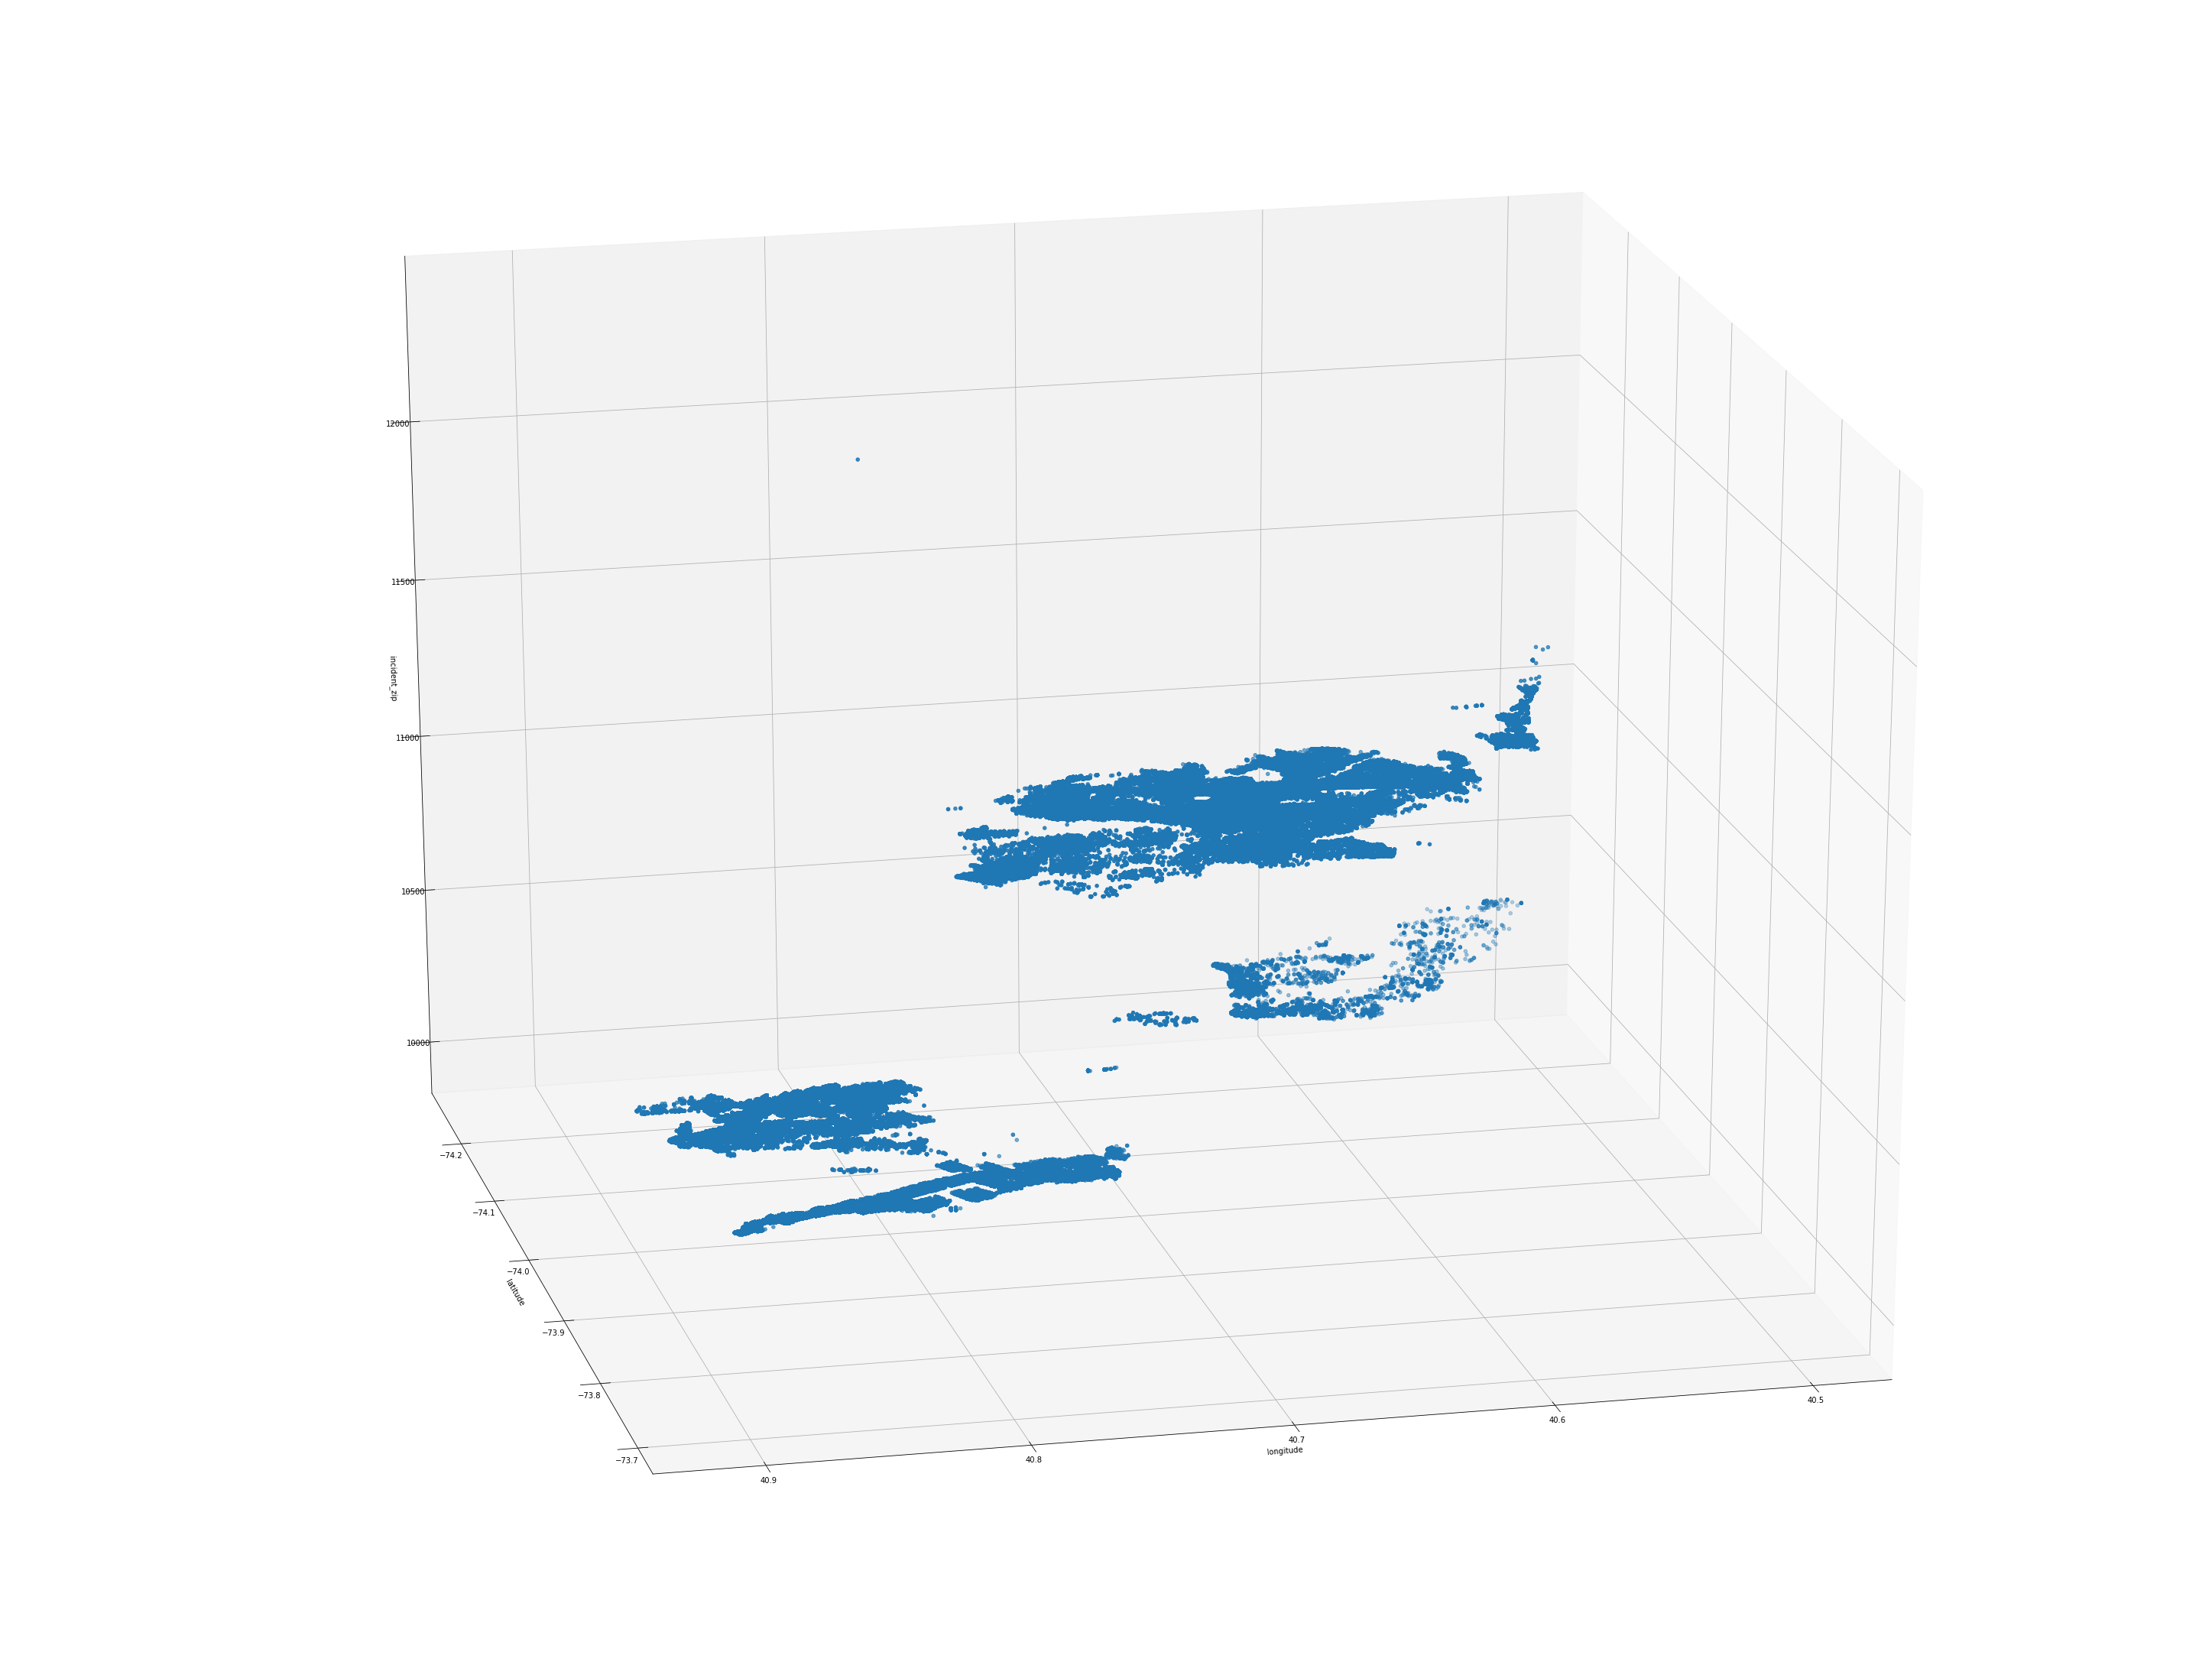

count    1.161919e+06
mean     1.071568e+04
std      5.165542e+02
min      1.000100e+04
25%      1.045200e+04
50%      1.046800e+04
75%      1.122200e+04
max      1.234500e+04
Name: incident_zip, dtype: float64
11226.0    38767
10458.0    36098
10467.0    35294
10468.0    31729
10453.0    31623
10452.0    26124
10031.0    25542
10457.0    25066
10456.0    23918
10462.0    23737
Name: incident_zip, dtype: int64


In [66]:
#Used already processed data frame df_hpd_top_complaint and accessed column Incident_Zip codes
#3D plotting of top_complaint HEAT HOTWATER as per Incident_Zip codes across the regions
#It will take some time to generate the 3D plot.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,5,5],elev=22,azim = 77)
plt.cla()
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('incident_zip')
ax.scatter(df_hpd_top_complaint.iloc[0:,8:9],df_hpd_top_complaint.iloc[0:,9:10],df_hpd_top_complaint.iloc[0:,3:4])
plt.show()
#From this plot it is understood Incident_Zip codes distrubuted with maximum of 12000 and minimum 1000
#lets verify this by using descriptive  statitics of Incident_Zip codes
df_hpd_top_complaint_incident_zip=df_hpd_top_complaint['incident_zip']
df_hpd_top_complaint_incident_zip.index = map(int,df_hpd_top_complaint.index)
print(df_hpd_top_complaint_incident_zip.describe())
#Descriptive statistics output match the scatter plot trend.
#Lets perform another analysis by looking at the distibution of Incident_Zip codes by top value_counts of Top_Complaint
df_hpd_top_complaint
df_hpd_top_complaint_zip_10 = df_hpd_top_complaint['incident_zip'].value_counts().head(10)
print(df_hpd_top_complaint_zip_10)
#we can observe in 3D scatter plot that Top 10 Incident_Zip codes for top_complaint type 
#are from Bronx,Manhattan and Brooklyn (as per longitude and latitudes in the 3Dplot) 


#### Looking for Top_Complaint severity with respect to Street

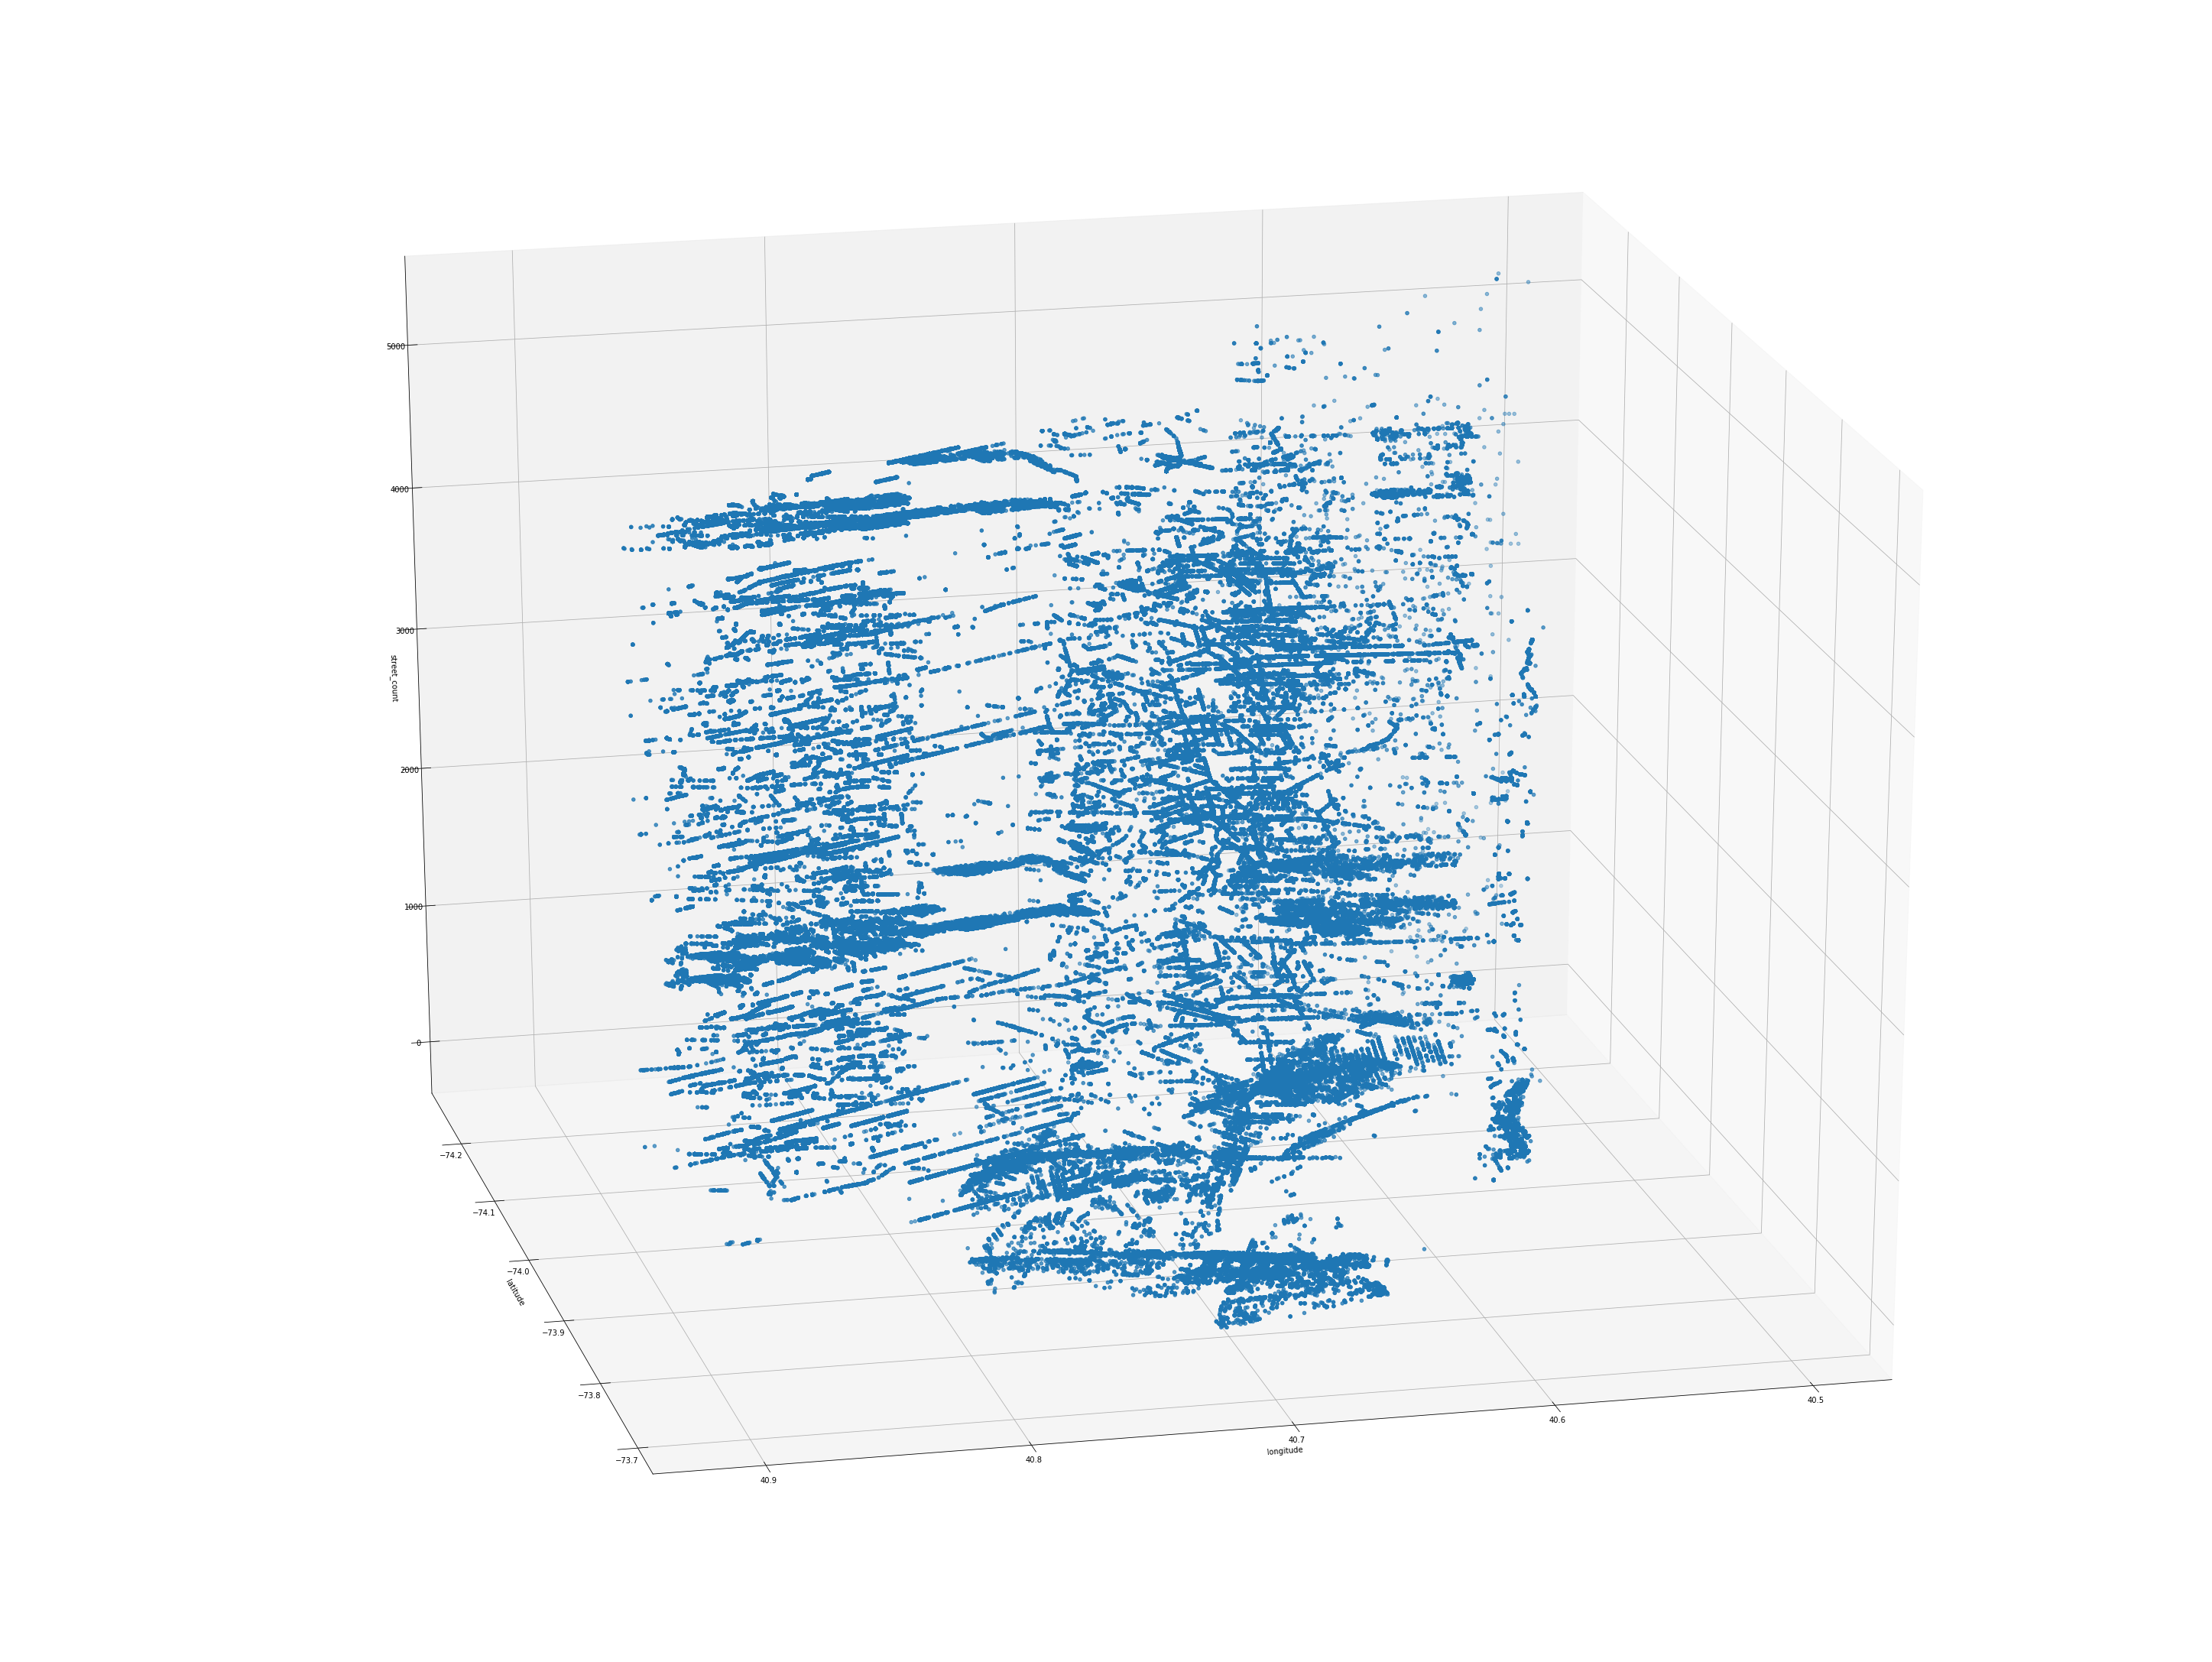

count             1168990
unique               5236
top       GRAND CONCOURSE
freq                20553
Name: street_name, dtype: object
borough    street_name             
BRONX      GRAND CONCOURSE             20553
MANHATTAN  BROADWAY                    13039
QUEENS     ELMHURST AVENUE             10028
BROOKLYN   OCEAN AVENUE                 9405
BRONX      MORRIS AVENUE                9207
           BOYNTON AVENUE               8429
MANHATTAN  ST NICHOLAS AVENUE           7802
           AMSTERDAM AVENUE             6929
BRONX      DR M L KING JR BOULEVARD     6391
BROOKLYN   OCEAN PARKWAY                5939
Name: street_name, dtype: int64


In [67]:
#3D plotting of top_complaint HEAT HOTWATER as per street_name across the regions
#It will take some time to generate the 3D plot.

#processing data frame to convert catogorical values into diffrent numeric type
df_hpd_top_complaint_street_name= df_hpd[df_hpd['complaint_type']=='HEAT/HOT WATER'].reset_index(drop=True)
df_hpd_top_complaint_street_name['street_name']=df_hpd_top_complaint_street_name['street_name'].astype('category')
cat_column = df_hpd_top_complaint_street_name.select_dtypes(['category']).columns
df_hpd_top_complaint_street_name[cat_column] = df_hpd_top_complaint_street_name[cat_column].apply(lambda x:x.cat.codes)
#print(df_hpd_top_complaint_street_name)

#plotting 3D Scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,5,5],elev=22,azim = 77)
plt.cla()
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('street_count')
ax.scatter(df_hpd_top_complaint_street_name.iloc[0:,8:9],df_hpd_top_complaint_street_name.iloc[0:,9:10],df_hpd_top_complaint_street_name.iloc[0:,5:6])
plt.show()
#From this plot it is understood  street_name distrubuted with maximum of 5200 and minimum 1
#lets verify this by using descriptive  statitics of street_name
df_hpd_top_complaint_street_name1=df_hpd_top_complaint['street_name']
# include object type by default describe will take only int type
print(df_hpd_top_complaint_street_name1.describe(include = object))
#It is observed that Descriptive statistics output match the scatter plot trend.

#Lets perform another analysis by looking at the distibution of street_name by top value_counts for Top_Complain
df_hpd_top_complaint=df_hpd[df_hpd['complaint_type']=='HEAT/HOT WATER'].reset_index(drop=True)
df_hpd_top_complaint_street_name2 = df_hpd_top_complaint.groupby(['borough'])
df_hpd_top_complaint_street_name3 = df_hpd_top_complaint_street_name2['street_name'].value_counts().sort_values(ascending=False).head(10)
print(df_hpd_top_complaint_street_name3)
#We can observe that output of data frame with 10 Street_names for various regions across borough.


## 3.conclusion:

#### From the analysis on NYHPD data set it is found that Evaluation of top complaint type had diffrent trends among borughs,ZIP codes and street_name .It is more concentrated in some regions than other regions(Ex:Bronx area had more  Top_complaint ratio than Queens and Staten), also for streets_name and incident_zip codes the Top_Complaint type is proritized (Ex:Elmhurst avenue street from Queens had Top_complaint ration than Brooklyn).

1.For 'borough' they must focus on BRONX,BROOKLYN AND MANHATTAN

2.Based on TOP_Complaint concentration the priorty should be given to top 10 Incident_zip codes
11226.0    
10458.0    
10467.0    
10468.0    
10453.0    
10452.0    
10031.0    
10457.0    
10456.0    
10462.0 

3.Based on priority the streets with Maximum complaint ratio should be servered first.

     1.GRAND CONCOURSE(BRONX )        20553
     2.BROADWAY(MANHATTAN)            13039
     3.ELMHURST AVENUE(QUEENS)        10028
     4.OCEAN AVENUE(BROOKLYN)         9408
     5.MORRIS AVENUE(BRONX)           9207
     6.BOYNTON AVENUE(BRONX)          8429
     7.ST NICHOLAS AVENUE(MANHATTAN)  7802
     8.AMSTERDAM AVENUE(MANHATTAN)    6929
     9.DR M L KING JR BOULEVARD(BRONX)6391
     10.OCEAN PARKWAY(BROOKLYN )      5939

#### Scripted By: Venkat Alapati